In [90]:
# Neural network classification
# make data
from sklearn.datasets import make_circles

n_smaples = 1000

X, y  = make_circles(n_samples=n_smaples, noise=0.03, random_state=42)

X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]], shape=(1000, 2)),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1

In [91]:
len(X), len(y)

(1000, 1000)

In [92]:
# Visualize the data in table format
import pandas as  pd

data = pd.DataFrame({"X1" : X[:,0], "X2": X[:,1], "y" : y})

data

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


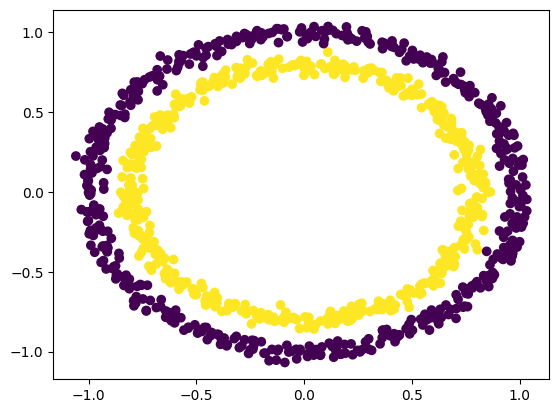

In [93]:
# visualize
import matplotlib.pyplot as plt


plt.scatter(data["X1"], data["X2"], c=y)

In [94]:
X.shape, y.shape

((1000, 2), (1000,))

In [95]:
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

In [96]:
type(X)

numpy.ndarray

In [97]:
# Convert the numpy array to tensors
import torch 
X = torch.from_numpy(X).type(torch.float32)

y = torch.from_numpy(y).type(torch.float32)



In [98]:
X , y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [106]:
from sklearn.model_selection import train_test_split

X__train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


len(X__train), len(y_test)

(800, 200)

In [108]:
# Buildimg model
import torch
from torch import nn

# make device agonstic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [110]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1= nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [112]:
model_1 = CircleModelV0()

model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5580,  0.1187],
                      [-0.5949,  0.0304],
                      [-0.2161, -0.6810],
                      [ 0.1996,  0.5878],
                      [ 0.1935,  0.4163]])),
             ('layer_1.bias',
              tensor([ 0.0039,  0.2152,  0.2103, -0.0332,  0.6820])),
             ('layer_2.weight',
              tensor([[-0.0468, -0.0843, -0.2425,  0.2723,  0.3711]])),
             ('layer_2.bias', tensor([0.2391]))])